# <center> Practice 01. Triangle Counting</center>

In [1]:
import graphblas as gb

gb.init("suitesparse", blocking=False)

from graphblas import Matrix, dtypes, unary, binary, monoid, semiring, Recorder
from graphblas.io import mmread
import numpy as np

In [2]:
M = mmread('../../data/karate/karate.mtx')
M

"M_0"      nvals  nrows  ncols  dtype     format
gb.Matrix    156     34     34   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5    6    7    8    9   ...   24   25   26   27  \
0        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0       ...                       
1   1.0       1.0  1.0                 1.0            ...                       
2   1.0  1.0       1.0                 1.0  1.0  1.0  ...                 1.0   
3   1.0  1.0  1.0                      1.0            ...                       
4   1.0                           1.0                 ...                       
5   1.0                           1.0                 ...                       
6   1.0                 1.0  1.0                      ...                       
7   1.0  1.0  1.0  1.0                                ...                       
8   1.0       1.0                                     ...                       
9             1.0                                     ...                       
10  1.0                 1.0  1.0                      ...                       
11  1.0                                               ...                       
12  1.0            1.0                                ...                       
13  1.0  1.0  1.0  1.0                                ...                       
14                                                    ...                       
15                                                    ...                       
16                           1.0  1.0                 ...                       
17  1.0  1.0                                          ...                       
18                                                    ...                       
19  1.0  1.0                                          ...                       
20                                                    ...                       
21  1.0  1.0                                          ...                       
22                                                    ...                       
23                                                    ...       1.0       1.0   
24                                                    ...       1.0       1.0   
25                                                    ...  1.0                  
26                                                    ...                       
27            1.0                                     ...  1.0                  
28            1.0                                     ...                       
29                                                    ...            1.0        
30       1.0                                1.0       ...                       
31  1.0                                               ...  1.0  1.0             
32            1.0                           1.0       ...                       
33                                          1.0  1.0  ...            1.0  1.0   

     28   29   30   31   32   33  
0                  1.0            
1             1.0                 
2   1.0                 1.0       
3                                 
4                                 
5                                 
6                                 
7                                 
8             1.0       1.0  1.0  
9                            1.0  
10                                
11                                
12                                
13                           1.0  
14                      1.0  1.0  
15                      1.0  1.0  
16                                
17                                
18                      1.0  1.0  
19                           1.0  
20                      1.0  1.0  
21                                
22                      1.0  1.0  
23       1.0            1.0  1.0  
24                 1.0            
25                 1.0            
26       1.0                 1.0  
27                           1.0  
28

In [3]:
M.dtype

FP64

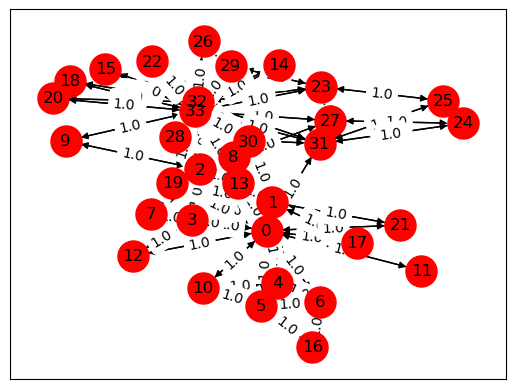

In [4]:
gb.viz.draw(M)

In [5]:
def naiveA3(A):
    return int(A.mxm(A.mxm(A)).diag().reduce(gb.agg.sum).value or 0) / 6

def naiveMaskA2(A):
    return int(A.mxm(A).dup(mask=A.dup(dtype=dtypes.BOOL)).reduce_scalar(gb.monoid.plus).value or 0) / 6

def cohen(A):
    return int(gb.select.tril(A).mxm(gb.select.triu(A)).dup(mask=A.dup(dtype=dtypes.BOOL)).reduce_scalar(gb.monoid.plus).value or 0) / 2

In [6]:
def test(A):
    result = [naiveA3(A), naiveMaskA2(A), cohen(A)]
    print(result)
    if not all(element == element for element in result):
       print("All return values are not equal")
    else:
        %timeit naiveA3(A)
        %timeit naiveMaskA2(A)
        %timeit cohen(A)

In [7]:
test(M)

[45.0, 45.0, 45.0]
85.6 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
54.3 µs ± 50.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
98.4 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
M1 = mmread('../../data/USpowerGrid/USpowerGrid.mtx')
M2 = mmread('../../data/auto/auto.mtx')

In [9]:
M1

"M_648897"  nvals  nrows  ncols  dtype     format
gb.Matrix   13188   4941   4941   FP64  csr (iso)
-------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 4931 4932 4933  \
0                                                       ...                  
1                                                       ...                  
2                                                       ...                  
3                                                       ...                  
4                                                       ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4936                                                    ...                  
4937                                                    ...                  
4938                                                    ...       1.0        
4939                                                    ...                  
4940                                                    ...                  

     4934 4935 4936 4937 4938 4939 4940  
0                                        
1                                        
2                                        
3                                        
4                                        
...   ...  ...  ...  ...  ...  ...  ...  
4936  1.0                                
4937       1.0                           
4938                           1.0       
4939                      1.0            
4940

In [10]:
test(M1)

[651.0, 651.0, 651.0]
2.43 ms ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
485 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
553 µs ± 8.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
M2

"M_648898"    nvals   nrows   ncols  dtype     format
gb.Matrix   6629222  448695  448695   FP64  csr (iso)
-----------------------------------------------------
     row     col  val
0      0      13  1.0
1      0     127  1.0
2      0     128  1.0
3      0    1313  1.0
4      0    1715  1.0
5      0    2929  1.0
6      0  109267  1.0
7      0  122837  1.0
8      0  144785  1.0
9      0  174292  1.0
...  ...     ...  ...

In [12]:
test(M2)

[6245184.0, 6245184.0, 6245184.0]
2.05 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
296 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
133 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
def cohen_recorder(A):
    with Recorder() as r:
        result = int(gb.select.tril(A).mxm(gb.select.triu(A)).dup(mask=A.dup(dtype=dtypes.BOOL)).reduce_scalar(gb.monoid.plus).value or 0) / 2
    return result, r 

In [14]:
cohen_recorder(M)

(45.0,
 gb.Recorder (not recording)
 ---------------------------
   GrB_Matrix_new(&M_699559, GrB_FP64, 34, 34);
   GrB_Matrix_select_BOOL(M_699559, NULL, NULL, GrB_TRIL, M_0, False, NULL);
   GrB_Matrix_new(&M_699560, GrB_FP64, 34, 34);
   GrB_Matrix_select_BOOL(M_699560, NULL, NULL, GrB_TRIU, M_0, False, NULL);
   GrB_Matrix_new(&M_699561, GrB_BOOL, 34, 34);
   GrB_Matrix_assign(M_699561, NULL, NULL, M_0, GrB_ALL, 34, GrB_ALL, 34, NULL);
   GrB_Matrix_new(&M_699562, GrB_FP64, 34, 34);
   GrB_mxm(M_699562, M_699561, NULL, GrB_PLUS_TIMES_SEMIRING_FP64, M_699559, M_699560, NULL);
   GrB_Scalar_new(&s_260472, GrB_FP64);
   GrB_Matrix_reduce_Monoid_Scalar(s_260472, NULL, GrB_PLUS_MONOID_FP64, M_699562, NULL);
   GrB_Scalar_extractElement_FP64(&s_temp, s_260472);)